In [57]:
from sklearn.datasets import load_iris # 데이터로드
iris_raw = load_iris()
iris_raw.data.shape # 150 x 4
iris_raw.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [58]:
iris_raw.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [63]:
iris_ori['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [64]:
import copy
iris_ori = iris_raw.copy()

import pandas as pd
iris = pd.DataFrame(iris_ori['data']
                   ,columns=iris_ori['feature_names'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 훈련,테스트분리

X_train, X_test, y_train, y_test = train_test_split(iris
                                                   ,iris_ori['target']
                                                   ,test_size=0.2
                                                   ,stratify=iris_ori['target']
                                                   ,random_state=42)
X_train.shape # 120 x 4
X_test.shape # 30 x 4

# 결정트리 모델 적용
tree = DecisionTreeClassifier(random_state=0)
tree3 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
tree3.fit(X_train, y_train)

# 결과
print(f"순수노드 훈련 세트 정확도 {tree.score(X_train,y_train) : .2f}") # 1.00
print(f"순수노드 테스트 세트 정확도 {tree.score(X_test,y_test) : .2f}") # 0.97
print('---')
print(f"순수노드 훈련 세트 정확도 {tree3.score(X_train,y_train) : .2f}") # 0.98
print(f"순수노드 테스트 세트 정확도 {tree3.score(X_test,y_test) : .2f}") # 0.97

순수노드 훈련 세트 정확도  1.00
순수노드 테스트 세트 정확도  0.97
---
순수노드 훈련 세트 정확도  0.98
순수노드 테스트 세트 정확도  0.97


In [83]:
from sklearn.tree import export_graphviz
export_graphviz(tree
               ,out_file='tree_iris.dot' # tree_iris.dot이라고 파일을 만듦
               ,class_names=iris_ori['target_names']
               ,feature_names=iris_ori['feature_names']
               ,impurity=False
               ,filled=True) 

export_graphviz(tree3
               ,out_file='tree3_iris.dot' # tree.dot이라고 파일을 만듦
               ,class_names=iris_ori['target_names']
               ,feature_names=iris_ori['feature_names']
               ,impurity=False
               ,filled=True) 

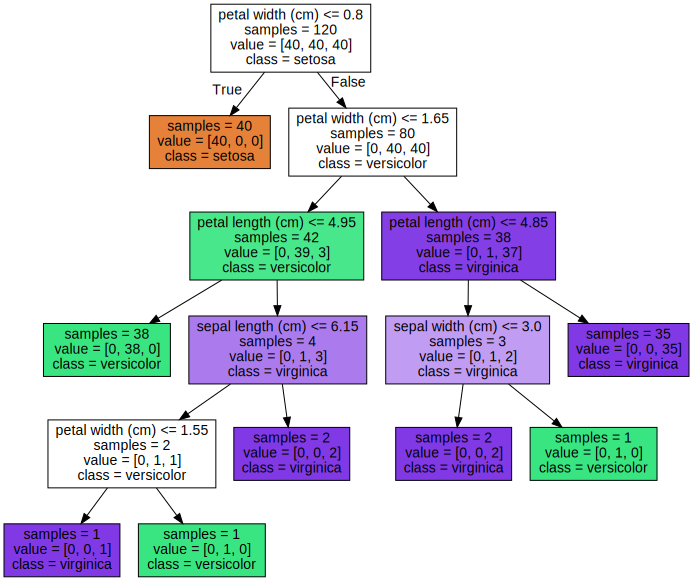

In [84]:
import graphviz
with open(("tree_iris.dot"), "r", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

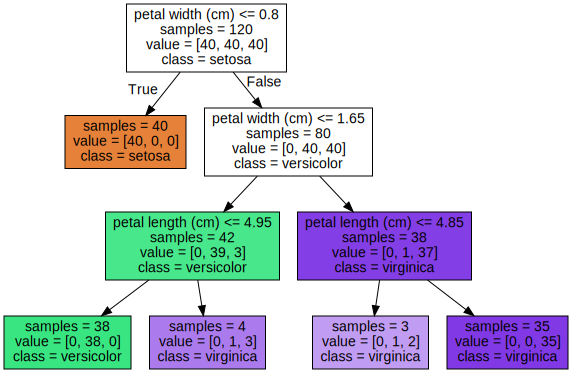

In [85]:
import graphviz
with open(("tree3_iris.dot"), "r", encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [92]:
# 폰트
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = iris.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris_ori['feature_names'])
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

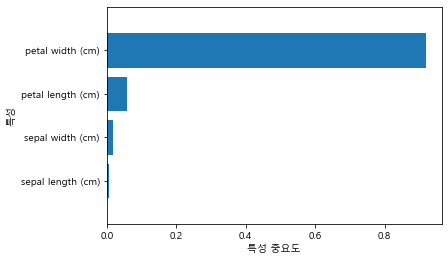

In [93]:
plot_feature_importances_cancer(tree)

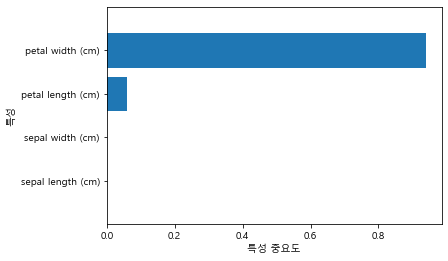

In [94]:
plot_feature_importances_cancer(tree3)